In [1]:
%cd ../

/home/dmoreno/pipeline_v4_final/pipeline/training/lc_classifiers/models/experimentation


In [2]:
%ls

ATAT/  classifiers/  MS-ATAT/  notebooks/


# Bottom level new taxonomy classifiers results

In [22]:
import mlflow
import pandas as pd
import matplotlib.pyplot as plt
import os
#os.environ["PATH"] = "/home/users/dmoreno2016/.TinyTeX/bin/x86_64-linux:" + os.environ["PATH"]

#plt.rcParams.update({
#    "text.usetex": True,
#    "pgf.texsystem": "pdflatex",
#    "font.family": "serif",
#    "font.serif": ["Palatino"],
#})

import warnings
warnings.filterwarnings('ignore')

In [23]:
order_classes = [
    "SNIa", "SNIbc", "SNIIb", "SNII", "SNIIn", "SLSN", 
    "TDE", "Microlensing", "QSO", "AGN", "Blazar", 
    "YSO", "CV/Nova", "LPV", "EA", "EB/EW", 
    "Periodic-Other", "RSCVn", "CEP", "RRLab", "RRLc", "DSCT"
]

class_hierarchy = {
    "Transient": ["SNIa", "SNIbc", "SNIIb", "SNII", "SNIIn", "SLSN", "TDE"],
    "Periodic": ["LPV", "EA", "EB/EW", "Periodic-Other", "RSCVn", "CEP", "RRLab", "RRLc", "DSCT"],
    "Stochastic": ["QSO", "AGN", "Blazar", "YSO", "CV/Nova", "Microlensing"],
}

# Lista de días evaluados
list_time_eval = ['8', '16', '32', '64', '128', '256', '512', '1024', 'None']

path_save_imgs = 'images'

os.makedirs(f'{path_save_imgs}', exist_ok=True)

In [13]:
mlflow.set_tracking_uri("file:./ATAT/results/ml-runs")

data_name =  'ztf_ff_20folds'
experiment_name = f"classification/{data_name}/testing"

experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment:
    experiment_id = experiment.experiment_id
    print(f"Experiment ID for '{experiment_name}': {experiment_id}")
else:
    print(f"Experiment '{experiment_name}' not found.")

runs = mlflow.search_runs(experiment_ids=[experiment_id])
runs = runs[
    (runs.status == 'FINISHED') & 
    (runs['metrics.mix/f1s_test/None_days'].notna())
    ]

# Identificadores de cada fold
fold_run = {v: k for k, v in zip(runs['run_id'], runs['params.general/fold'])}

display(runs.head())
print(runs.shape)
print(fold_run)

Experiment ID for 'classification/ztf_ff_20folds/testing': 245279619942506979


,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.loss_test/128_days/lc,metrics.mix/rcl_train_step,metrics.mix/acc_train_step,metrics.loss_test/16_days/lc,...,params.general/lr,params.general/use_mask_detection,params.general/name_dataset,params.general/batch_size,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.parentRunId,tags.mlflow.source.name,tags.mlflow.source.git.commit,tags.mlflow.source.type
0,7e904626d55d4717917cc4e9f41bd9e2,245279619942506979,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-03-05 09:54:48.048000+00:00,2025-03-05 16:18:15.912000+00:00,1.389824,0.928301,0.937500,1.714126,...,0.0001,False,ztf_ff_20folds,256,Fold_8_2025-03-05_09-54-47,dmoreno,6bc9aaaadff7401c9ca63c05eb632f23,training.py,5c6102a61b03fabc8148db14effaf2b91e61874b,LOCAL
2,57eca164e1bd43dfbbb3c1ec8fbb67a1,245279619942506979,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-03-05 09:53:25.427000+00:00,2025-03-05 15:00:59.143000+00:00,1.392455,0.922078,0.921875,1.690907,...,0.0001,False,ztf_ff_20folds,256,Fold_7_2025-03-05_09-53-24,dmoreno,20ebdcbf9ef045a9a4ab6c81b111a9fd,training.py,5c6102a61b03fabc8148db14effaf2b91e61874b,LOCAL
4,7dfbf6865cf04d9e84a1f70c2d09e728,245279619942506979,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-03-04 05:22:37.801000+00:00,2025-03-04 10:23:02.896000+00:00,1.393318,0.902273,0.883117,1.700348,...,0.0001,False,ztf_ff_20folds,256,Fold_4_2025-03-03_09-45-22,dmoreno,87e3a59bb7bb4250975a33b839d16963,training.py,5c6102a61b03fabc8148db14effaf2b91e61874b,LOCAL
5,d37c7c5dd8354332b03b1851f0149f2a,245279619942506979,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-03-03 22:46:28.714000+00:00,2025-03-04 05:22:37.796000+00:00,1.375194,0.882413,0.890625,1.687212,...,0.0001,False,ztf_ff_20folds,256,Fold_2_2025-03-03_09-45-22,dmoreno,87e3a59bb7bb4250975a33b839d16963,training.py,5c6102a61b03fabc8148db14effaf2b91e61874b,LOCAL
6,efc132ed9ff04f30bc820607942e8939,245279619942506979,FINISHED,file:///home/dmoreno/pipeline_v4_final/pipelin...,2025-03-03 09:45:23.380000+00:00,2025-03-03 22:46:28.709000+00:00,1.359011,0.921429,0.929688,1.680357,...,0.0001,False,ztf_ff_20folds,256,Fold_1_2025-03-03_09-45-22,dmoreno,87e3a59bb7bb4250975a33b839d16963,training.py,5c6102a61b03fabc8148db14effaf2b91e61874b,LOCAL


(20, 138)
{'8': '7e904626d55d4717917cc4e9f41bd9e2', '7': '57eca164e1bd43dfbbb3c1ec8fbb67a1', '4': '7dfbf6865cf04d9e84a1f70c2d09e728', '2': 'd37c7c5dd8354332b03b1851f0149f2a', '1': 'efc132ed9ff04f30bc820607942e8939', '5': '62e883e5b89f4df3a5f68510c8e68ad8', '14': '0e92a365d4724e35b5101f26c9246009', '17': '822c23da966b42fd8eb6ba0b9cb898d6', '11': 'ac5968ac75d04cff9b8dc0d8ceefbca0', '13': '39eaa640969f4608bdc43030d95a00be', '16': '8871ab072ae94ea39a28ab4b8c0ca6d0', '10': 'bc9d68d233aa44d0b80b6857354b8678', '19': 'afc360afa539404b86ef611a42a14d73', '18': 'db764a89657c44bb9bb1f81203b902e0', '15': 'e7d8741752b647fbb7cd45a8382bc1d2', '12': 'c2f1cf053b934280a69889400c3e7c01', '9': '11d1214f9b504dffb9049bb8eb7cc18a', '6': 'e7b58cf8cb504c918cd81fd468733632', '3': 'f8fc9f30587349558851b7d780750260', '0': '4e54be66c0484ab690767b4cbef2aa64'}


## ATAT and HBRF predictions

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# Inicializar estructuras para almacenar resultados
atat_y_pred_fold = {}
hbrf_y_pred_fold = {}
combined_y_pred_fold = {}
y_test_fold = {}

# Iterar sobre los valores de time_eval (días)
for time_eval in list_time_eval:
    atat_y_pred_fold[f'{time_eval}_days'] = []
    hbrf_y_pred_fold[f'{time_eval}_days'] = []
    combined_y_pred_fold[f'{time_eval}_days'] = []
    y_test_fold[f'{time_eval}_days'] = []  # Guardar valores reales (y_true)

    for fold, run_id in fold_run.items():
        # Cargar predicciones de ATAT
        path_clf_report = f'./ATAT/results/ml-runs/{experiment_id}/{run_id}/artifacts'
        atat_df_predictions = pd.read_parquet(f'{path_clf_report}/ndays_results/LCs/predictions_test_{time_eval}.parquet').set_index('id')
        y_test = atat_df_predictions['y_true'].values
        atat_y_pred = atat_df_predictions['y_pred'].values

        # Cargar predicciones de HBRF
        root = 'classifiers/results/241209_ndetge8_20folds/HBRF_20250306-141821'
        hbrf_df_predictions = pd.read_parquet(f'{root}/fold_{fold}/predictions_test.parquet')
        hbrf_df_predictions = hbrf_df_predictions[hbrf_df_predictions['shorten'] == time_eval]
        hbrf_df_predictions.index = hbrf_df_predictions.index.astype(str).str.split('_').str[1]
        hbrf_df_predictions = hbrf_df_predictions.reindex(atat_df_predictions.index)
        hbrf_y_pred = hbrf_df_predictions['y_pred'].values

        # Promediar predicciones de ATAT y HBRF
        combined_y_pred_prob_fold = (atat_df_predictions[order_classes] + hbrf_df_predictions[order_classes]) / 2
        
        # Guardar valores en estructuras
        atat_y_pred_fold[f'{time_eval}_days'].append(atat_y_pred)
        hbrf_y_pred_fold[f'{time_eval}_days'].append(hbrf_y_pred)
        combined_y_pred_fold[f'{time_eval}_days'].append(combined_y_pred_prob_fold.idxmax(axis=1))
        y_test_fold[f'{time_eval}_days'].append(y_test)


In [15]:
from sklearn.metrics import classification_report, confusion_matrix

metrics_by_time = {time_eval: {"ATAT": [], "HBRF": [], "Combined": []} for time_eval in list_time_eval}
confusion_matrices = {} 

for time_eval in list_time_eval:
    for fold in range(len(fold_run)):  # Iterar sobre los folds
        y_test = y_test_fold[f"{time_eval}_days"][fold]
        y_pred_atat = atat_y_pred_fold[f"{time_eval}_days"][fold]
        y_pred_hbrf = hbrf_y_pred_fold[f"{time_eval}_days"][fold]
        y_pred_combined = combined_y_pred_fold[f"{time_eval}_days"][fold]

        # Calcular reporte de métricas inter
        report_atat_inter = classification_report(y_test, y_pred_atat, output_dict=True)
        report_hbrf_inter = classification_report(y_test, y_pred_hbrf, output_dict=True)
        report_combined_inter = classification_report(y_test, y_pred_combined, output_dict=True)

        # Guardar métricas
        metrics_by_time[time_eval]["ATAT"].append(report_atat_inter)
        metrics_by_time[time_eval]["HBRF"].append(report_hbrf_inter)
        metrics_by_time[time_eval]["Combined"].append(report_combined_inter)

        # Guardar matrices de confusión solo cuando time_eval es None
        if time_eval == 'None':
            if time_eval not in confusion_matrices:
                confusion_matrices[time_eval] = {"ATAT": [], "HBRF": [], "Combined": []}
            
            cm_atat = confusion_matrix(y_test, y_pred_atat, labels=order_classes)
            cm_hbrf = confusion_matrix(y_test, y_pred_hbrf, labels=order_classes)
            cm_combined = confusion_matrix(y_test, y_pred_combined, labels=order_classes)

            confusion_matrices[time_eval]["ATAT"].append(cm_atat)
            confusion_matrices[time_eval]["HBRF"].append(cm_hbrf)
            confusion_matrices[time_eval]["Combined"].append(cm_combined)

In [19]:
import pandas as pd
import numpy as np

# Diccionario dinámico para almacenar los datos de cada categoría
data_inter = {category: [] for category in order_classes}
data_inter_macro = []

for time_eval in list_time_eval:
    for category in order_classes:
        row = [time_eval]
        for model in ["ATAT", "HBRF", "Combined"]:
            recalls = [metrics_by_time[time_eval][model][fold][category]["recall"] * 100 
                       for fold in range(len(fold_run))]
            precision = [metrics_by_time[time_eval][model][fold][category]["precision"] * 100 
                         for fold in range(len(fold_run))]
            f1_score = [metrics_by_time[time_eval][model][fold][category]["f1-score"] * 100 
                        for fold in range(len(fold_run))]

            row.extend([
                f"{np.mean(precision):.2f} ± {np.std(precision):.2f}",
                f"{np.mean(recalls):.2f} ± {np.std(recalls):.2f}",
                f"{np.mean(f1_score):.2f} ± {np.std(f1_score):.2f}"
            ])

        # Guardar la fila en el diccionario correspondiente a la categoría
        data_inter[category].append(row)

    # Calcular y guardar macro promedio por cada time_eval
    row_macro = [time_eval]
    for model in ["ATAT", "HBRF", "Combined"]:
        macro_precision = [metrics_by_time[time_eval][model][fold]["macro avg"]["precision"] * 100 
                           for fold in range(len(fold_run))]
        macro_recall = [metrics_by_time[time_eval][model][fold]["macro avg"]["recall"] * 100 
                        for fold in range(len(fold_run))]
        macro_f1 = [metrics_by_time[time_eval][model][fold]["macro avg"]["f1-score"] * 100 
                    for fold in range(len(fold_run))]

        row_macro.extend([
            f"{np.mean(macro_precision)} ± {np.std(macro_precision)}",
            f"{np.mean(macro_recall)} ± {np.std(macro_recall)}",
            f"{np.mean(macro_f1)} ± {np.std(macro_f1)}"
        ])
    
    data_inter_macro.append(row_macro)

# Crear DataFrames para cada categoría dinámicamente
columns = ["Time (days)", 
           "ATAT Precision", "ATAT Recall", "ATAT F1-score",
           "HBRF Precision", "HBRF Recall", "HBRF F1-score",
           "Combined Precision", "Combined Recall", "Combined F1-score"]

df_inter = {category: pd.DataFrame(data, columns=columns).set_index("Time (days)") 
            for category, data in data_inter.items()}

# Crear DataFrame para Macro Promedio
df_inter_macro = pd.DataFrame(data_inter_macro, columns=columns).set_index("Time (days)")

# -------------------------------
# **MOSTRAR RESULTADOS**
# -------------------------------
display(df_inter_macro.head())
print(f'Number of classes: {len(df_inter)}')

,ATAT Precision,ATAT Recall,ATAT F1-score,HBRF Precision,HBRF Recall,HBRF F1-score,Combined Precision,Combined Recall,Combined F1-score
Time (days),,,,,,,,,
8,59.94079317936971 ± 1.5744182395316897,57.77150280208853 ± 0.7212493505548483,57.63312457713572 ± 0.8423235682311185,51.72057590334741 ± 0.42451873766861237,58.37703695069236 ± 0.490888558994236,52.14642402024757 ± 0.4013132494497082,60.394052826585074 ± 1.3627312494658061,59.09766641921588 ± 0.6770002564367182,58.74578988525153 ± 0.7192823109707756
16,64.92762774829939 ± 1.3140886081235754,62.288872254319166 ± 0.6962871076223783,62.71471743563111 ± 0.7882557207224673,56.96096475719935 ± 0.4796699338770782,63.00106848378929 ± 0.4168316281080571,57.74634658696148 ± 0.3868928163397332,65.72119179026444 ± 1.3707998564691022,63.68578398174141 ± 0.7419355564780286,63.955711340557 ± 0.8431468656145573
32,69.25750456782451 ± 1.3860594135928772,66.37606144951923 ± 0.8363320032454135,67.00536368430028 ± 0.9067642381146015,65.19804578141722 ± 1.7686619097326968,69.65496319619717 ± 0.3472308866444121,65.0946803865722 ± 0.4302565520997766,70.65090623405686 ± 1.3804516661710908,68.06945767893532 ± 0.7480389567057978,68.5781669081741 ± 0.7468944403629862
64,72.34243701348065 ± 1.371486720973536,69.72813495920848 ± 0.6840500349059939,70.30795364294951 ± 0.643037690553921,68.22989678005032 ± 1.596037254802531,72.40960865984306 ± 0.31831554678594104,68.5546408133299 ± 0.3928002547803616,73.89475622400258 ± 1.628153716623965,71.39191943662806 ± 0.6527149874623542,71.90887066496852 ± 0.6532658892067895
128,73.8933112454859 ± 1.3517204691550728,71.25234409648732 ± 0.8211641174124695,71.90970730500938 ± 0.7533564151791192,69.28547155658906 ± 1.2995037260632616,73.54188494283622 ± 0.2621191403858113,70.05573504958183 ± 0.3938059731346093,75.36619076637264 ± 1.5802106850894302,72.68379552935434 ± 0.6969974462496268,73.2925913334229 ± 0.6775019217108577


Number of classes: 22


In [24]:
def get_mean_std(list_values):
    means = []
    std_devs = []
    for values in list_values:
        mean, std_dev = values.split(" ± ")
        means.append(float(mean))
        std_devs.append(float(std_dev))
    return means, std_devs

In [25]:
atat_f1, atat_f1_err =  get_mean_std(df_inter_macro['ATAT F1-score'].values)
hbrf_f1, hbrf_f1_err =  get_mean_std(df_inter_macro['HBRF F1-score'].values)
combined_f1, combined_f1_err = get_mean_std(df_inter_macro['Combined F1-score'].values)
days = [int(k) if k != 'None' else 2039 for k in df_inter_macro.index.values]

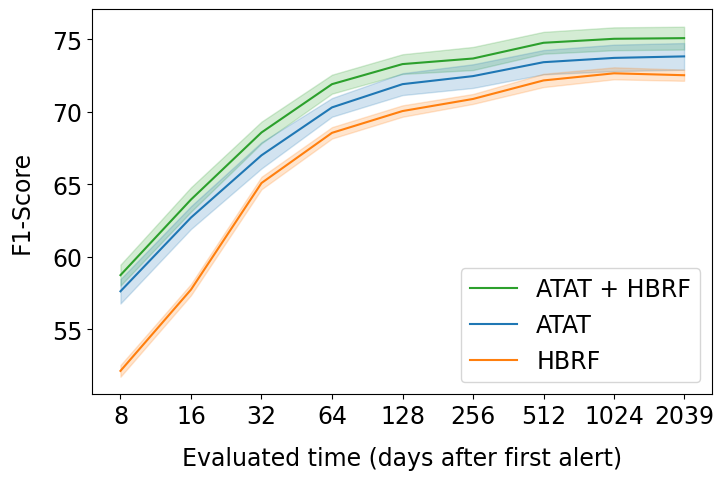

In [30]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 5))

# Graficar los datos con barras de error
ax.plot(days, combined_f1, linestyle='-', label='ATAT + HBRF', color='tab:green')
ax.plot(days, atat_f1, linestyle='-', label='ATAT', color='tab:blue')
ax.plot(days, hbrf_f1, linestyle='-', label='HBRF', color='tab:orange')

ax.fill_between(days, np.array(combined_f1) - np.array(combined_f1_err), np.array(combined_f1) + np.array(combined_f1_err), color='tab:green', alpha=0.2)
ax.fill_between(days, np.array(atat_f1) - np.array(atat_f1_err), np.array(atat_f1) + np.array(atat_f1_err), color='tab:blue', alpha=0.2)
ax.fill_between(days, np.array(hbrf_f1) - np.array(hbrf_f1_err), np.array(hbrf_f1) + np.array(hbrf_f1_err), color='tab:orange', alpha=0.2)


# Resaltar el máximo F1-score de todos los modelos
max_f1 = max(max(atat_f1), max(hbrf_f1), max(combined_f1)) 
max_idx = None
max_day = None

# Determinar a qué modelo y día pertenece el máximo F1-score
for idx, (a, h, c) in enumerate(zip(atat_f1, hbrf_f1, combined_f1)):
    if max_f1 in [a, h, c]:  # Verificar a qué curva pertenece
        max_idx = idx
        max_day = days[idx]
        break

# Configurar el eje X con escala logarítmica en base 2
list_time_to_eval = sorted(days)  # Asegurar que los valores estén ordenados
ax.set_xscale('log', base=2)
ax.set_xticks(list_time_to_eval)

# Configurar etiquetas, título y límites
fs = 17
#ax.set_title('F1-Score by Evaluation Time', fontsize=fs + 2, fontweight='bold', pad=15)
ax.set_xlabel('Evaluated time (days after first alert)', fontsize=fs, labelpad=13)
ax.set_ylabel('F1-Score', fontsize=fs, labelpad=13)
ax.tick_params(axis='y', labelsize=fs)
ax.set_xticklabels(list_time_to_eval, fontsize=fs)
#ax.set_ylim(51, 79)
ax.legend(fontsize=fs)

# Mostrar la gráfica
plt.savefig(f"{path_save_imgs}/eval_time_bottom_lvl_new_tax.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def get_confusion_matrix(matrices, order_classes, class_hierarchy=None, path_save=None, figsize=(13, 13), shrink=0.675):
    # Calculando la media y la desviación estándar
    median_matrix = np.median(matrices, axis=0)
    p5_matrix = np.abs(median_matrix - np.percentile(matrices, 5, axis=0))
    p95_matrix = np.abs(median_matrix - np.percentile(matrices, 95, axis=0)) 

    matrices_norm = np.array([m / m.sum(axis=1, keepdims=True) for m in matrices])
    matrices_norm = np.nan_to_num(matrices_norm)
    mean_matrices_norm = np.mean(matrices_norm, axis=0)
        
    # Graficando la matriz media
    cmap = plt.cm.Blues
    fig, ax = plt.subplots(figsize=figsize, dpi=150)
    #norm = mcolors.Normalize(vmin=0, vmax=np.max(median_matrix))
    #median_matrix = 
    im = ax.imshow(np.around(mean_matrices_norm, decimals=2), interpolation='nearest', cmap=cmap, aspect=.9, vmax=1)#, #norm=norm)

    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, ax=ax, pad=0.02, aspect=40, shrink=shrink)
    cbar.ax.tick_params(labelsize=17)

    # color map
    new_color = cmap(1.0) 

    # Añadiendo manualmente las anotaciones con la media y desviación estándar
    for i in range(median_matrix.shape[0]):
        for j in range(median_matrix.shape[1]):
            mean_val = int(median_matrix[i, j])
            p5_val = int(p5_matrix[i, j])
            p95_val = int(p95_matrix[i, j])

            if mean_matrices_norm[i, j] >= 0.0005:
                text = f'{mean_val}'
                text_p95 = f'+{p95_val}' if p95_val != 0 else ''  # P95 arriba
                text_p5 = f'−{p5_val}' if p5_val != 0 else ''  # P5 abajo

                color = "white" if mean_matrices_norm[i, j] > 0.5 else new_color

                ax.text(j - 0.13, i, text, ha="center", va="center", color=color, fontsize=15.5)
                ax.text(j + 0.018, i - 0.15, text_p95, ha="left", va="bottom", color=color, fontsize=11)
                ax.text(j + 0.018, i + 0.15, text_p5, ha="left", va="top", color=color, fontsize=11)
            else:
                text = f'{mean_val}'
                color = "white" if mean_matrices_norm[i, j] > 0.5 else new_color
                ax.text(j, i, text, ha="center", va="center", color=color, fontsize=12.5)

    # Ajustes finales y mostrar la gráfica
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xticks(np.arange(len(order_classes)))
    ax.set_yticks(np.arange(len(order_classes)))
    ax.set_xticklabels(order_classes)
    ax.set_yticklabels(order_classes)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)
    ax.xaxis.labelpad = 13
    ax.yaxis.labelpad = 13

    if class_hierarchy is not None:
        for class_list in class_hierarchy.values():
            indices = [order_classes.index(cls) for cls in class_list if cls in order_classes]
            if indices:
                min_idx, max_idx = min(indices), max(indices)
                rect = patches.Rectangle(
                    (min_idx - 0.5, min_idx - 0.5),  # Esquina superior izquierda
                    max_idx - min_idx + 1,  # Ancho
                    max_idx - min_idx + 1,  # Alto
                    linewidth=2, edgecolor="black", facecolor='none', clip_on=False
                )
                ax.add_patch(rect)

    ax.set_ylabel('True Label', fontsize=17)
    ax.set_xlabel('Predicted Label', fontsize=17)

    plt.setp(ax.get_xticklabels(), rotation=65, ha='center', va='top', rotation_mode="default")
    plt.tight_layout()

    if path_save is not None:
        plt.savefig(f"{path_save}", format="pdf", bbox_inches="tight")

    plt.show()

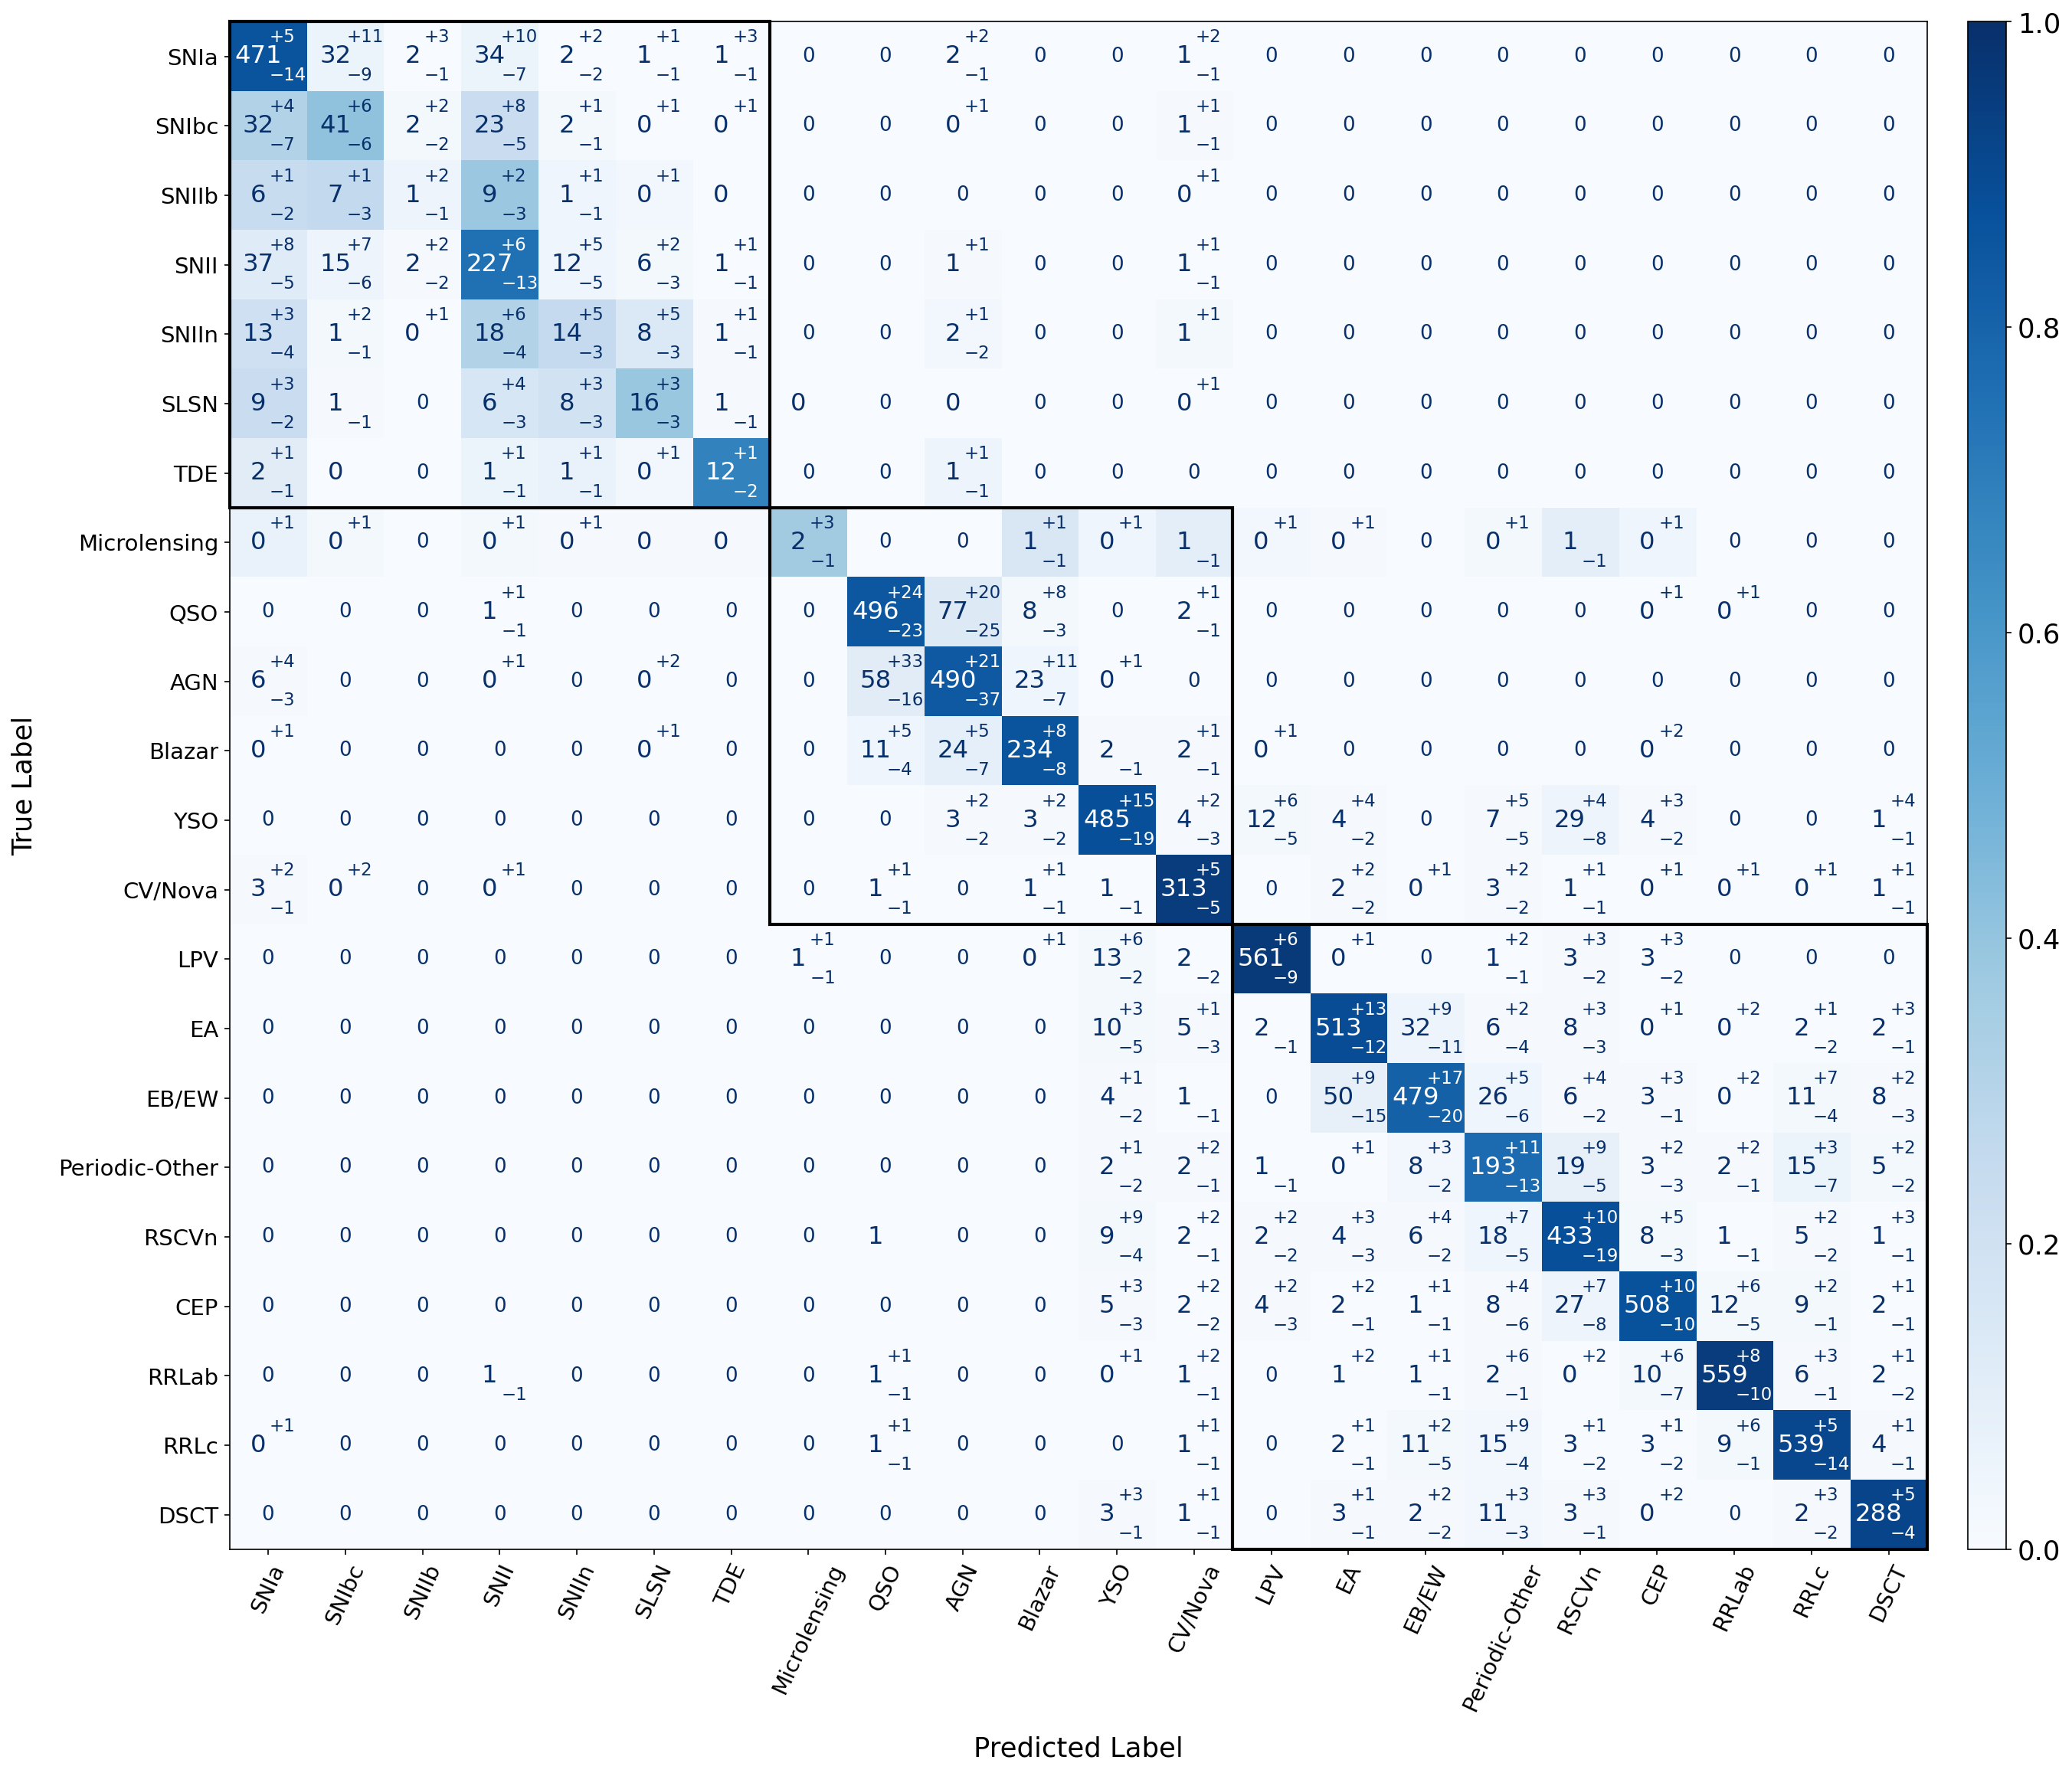

In [59]:
matrices = confusion_matrices['None']['ATAT']
path_save = f'{path_save_imgs}/cm_atat_bottom_lvl_new_tax.pdf'
get_confusion_matrix(matrices, order_classes, class_hierarchy=class_hierarchy, path_save=path_save, figsize=(20,20), shrink=0.675)

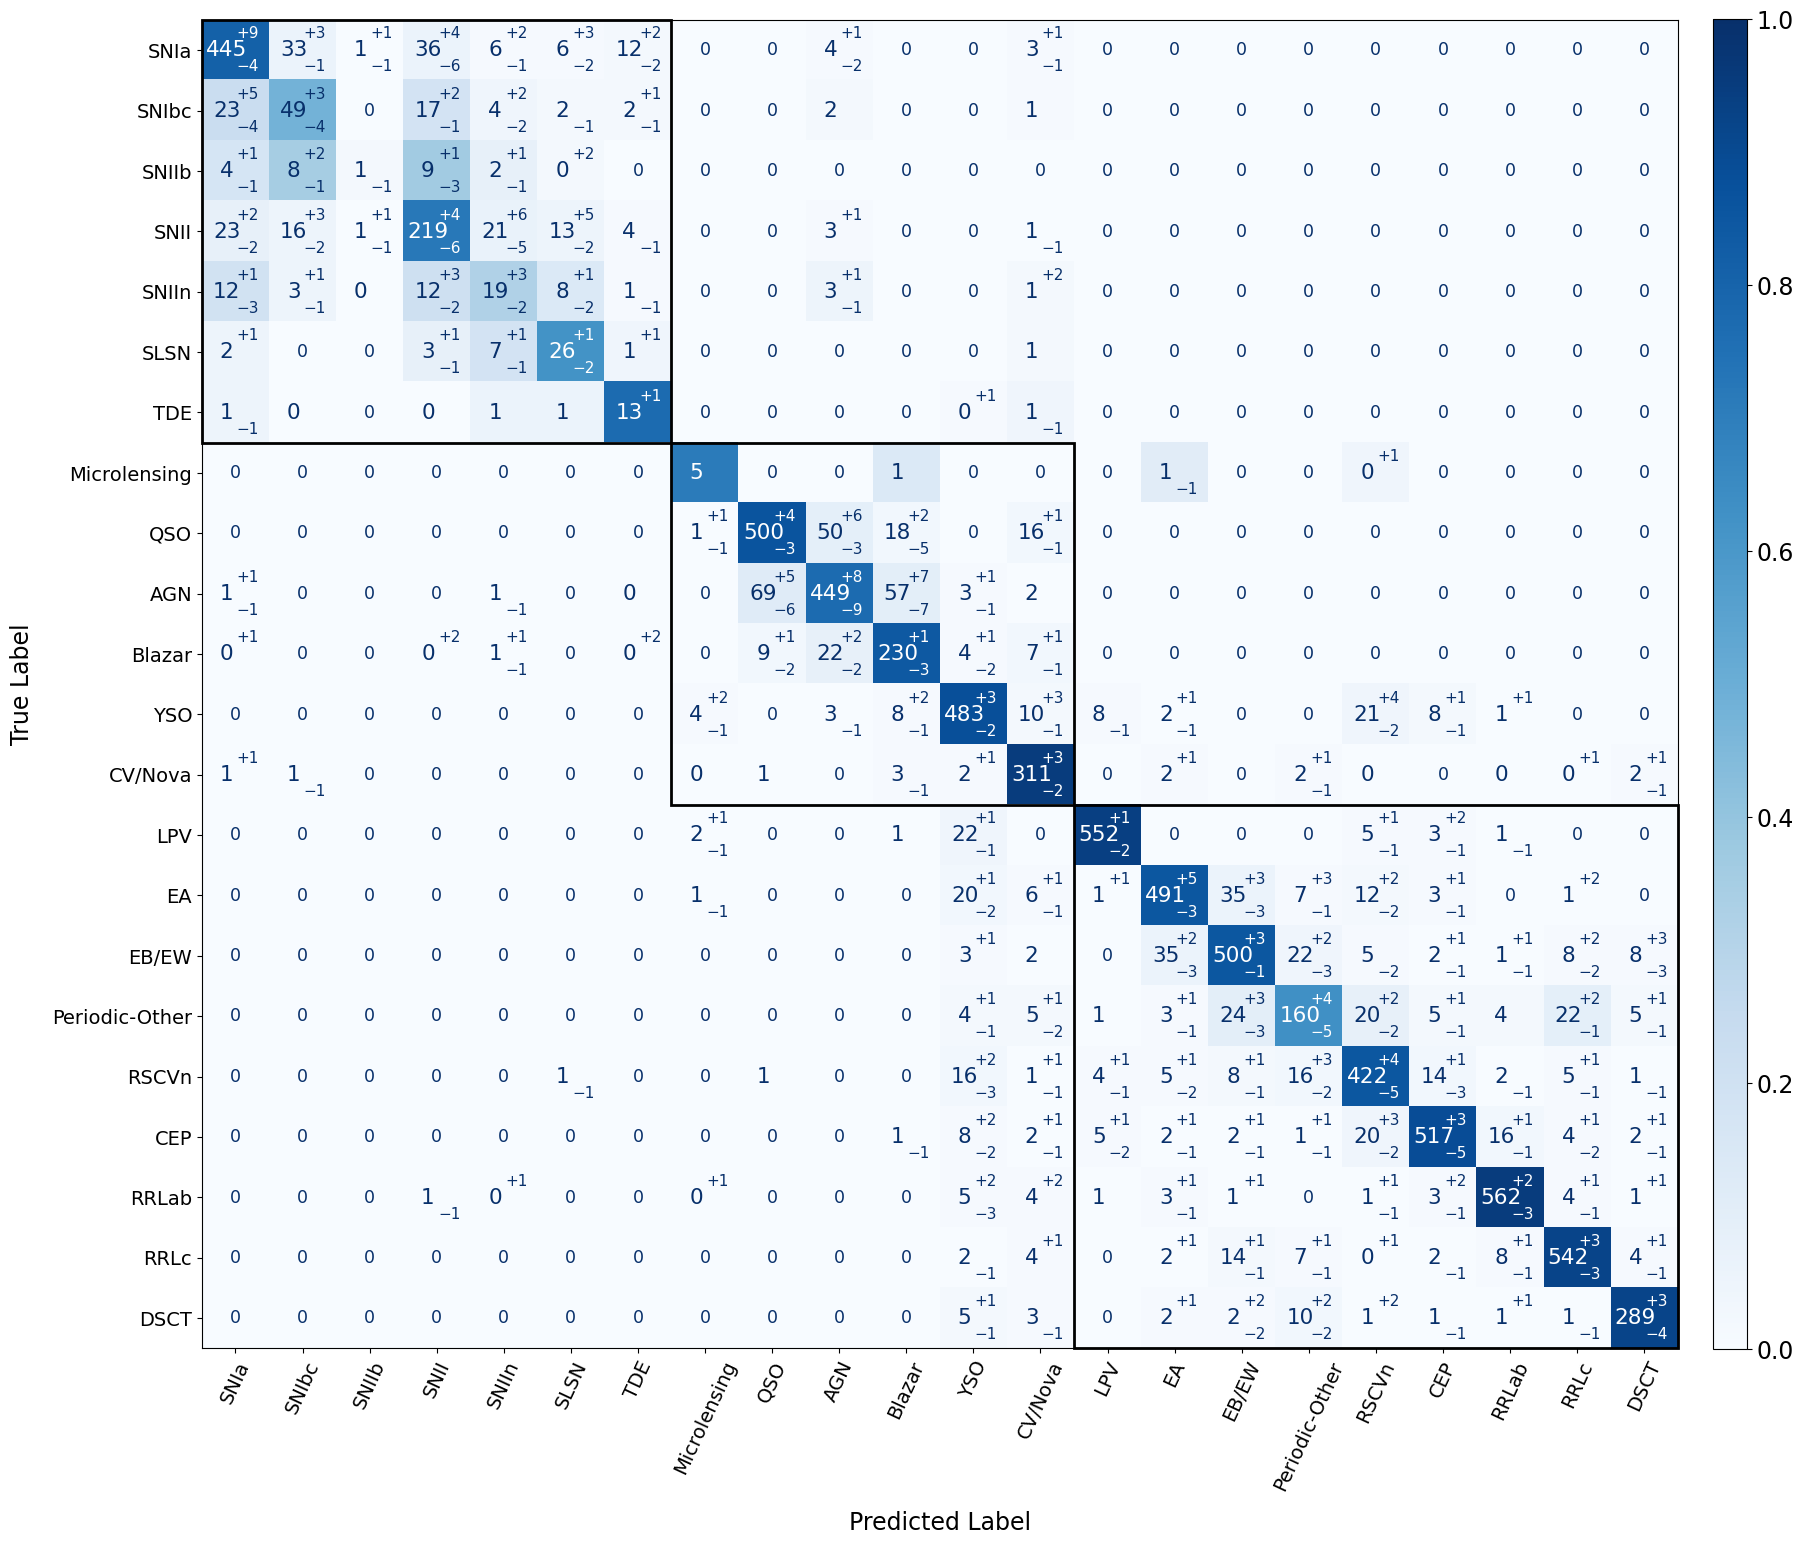

In [54]:
matrices = confusion_matrices['None']['HBRF']
path_save = f'{path_save_imgs}/cm_hbrf_bottom_lvl_new_tax.pdf'
get_confusion_matrix(matrices, order_classes, class_hierarchy=class_hierarchy, path_save=path_save, figsize=(20,20), shrink=0.675)

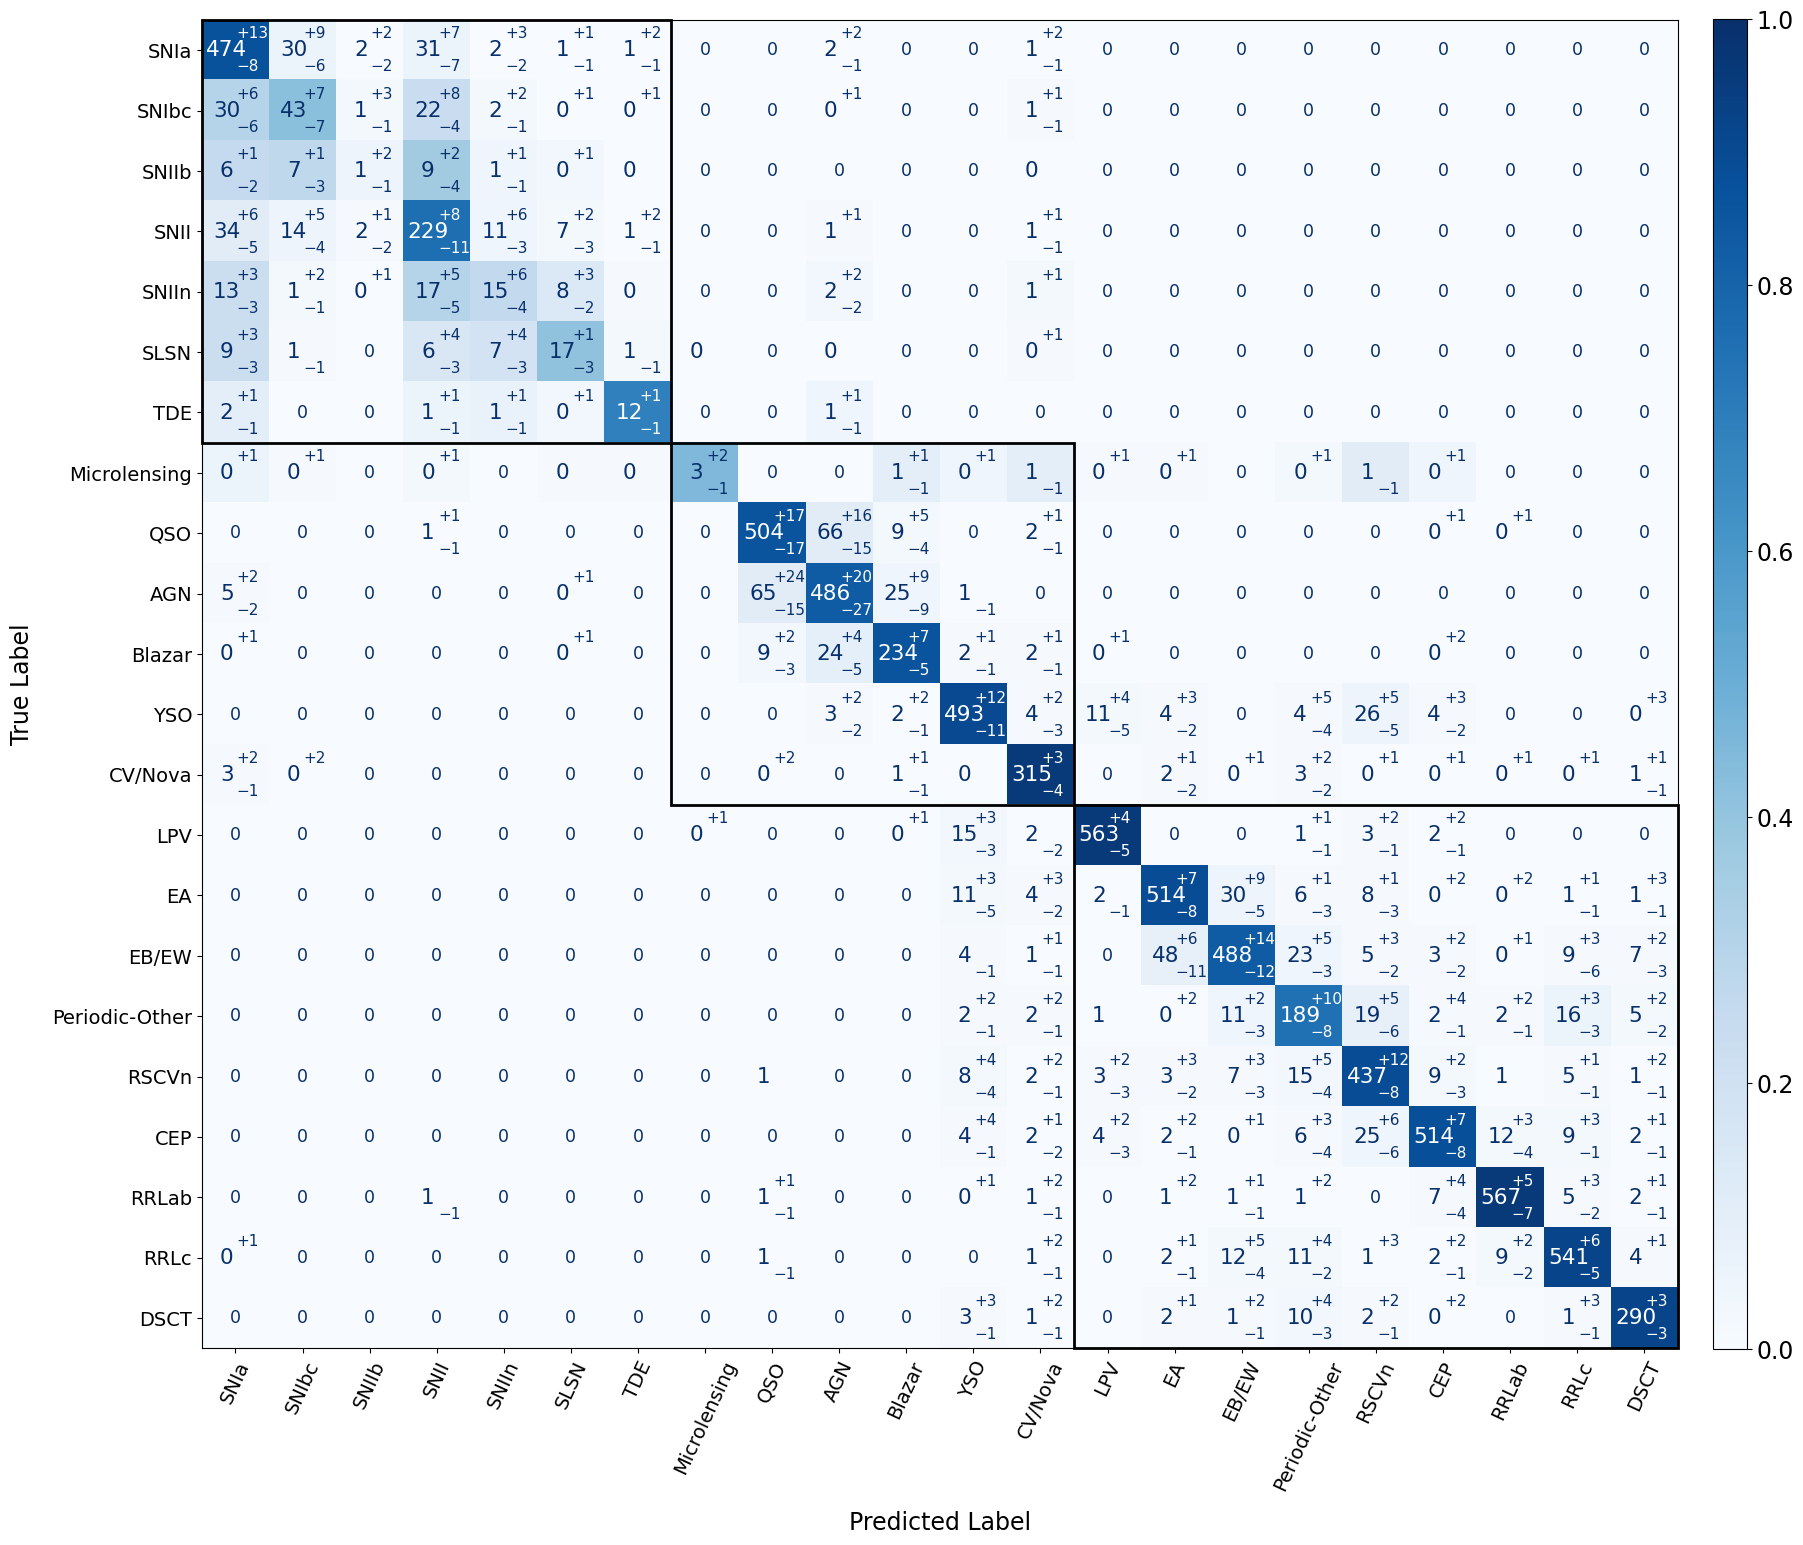

In [55]:
matrices = confusion_matrices['None']['Combined']
path_save = f'{path_save_imgs}/cm_combined_bottom_lvl_new_tax.pdf'
get_confusion_matrix(matrices, order_classes, class_hierarchy=class_hierarchy, path_save=path_save, figsize=(20,20), shrink=0.675)